In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt 
import numpy as np
import wandb
from src.model import NeuralNetwork
from src.utils import one_hot_encode

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
# Split training data: 90% train, 10% validation
split_index = int(0.9 * X_train.shape[0])
X_val = X_train[split_index:]
y_val = y_train[split_index:]
X_train = X_train[:split_index]
y_train = y_train[:split_index]
# One-hot encode labels
num_classes = 10
y_train_encoded = one_hot_encode(y_train, num_classes)
y_val_encoded = one_hot_encode(y_val, num_classes)
y_test_encoded = one_hot_encode(y_test, num_classes)

In [4]:
model = NeuralNetwork(
    input_size=784,
    hidden_size=64, 
    num_layers=3, 
    output_size=10,
    activation="ReLU",
    weight_init="Xavier",
    loss_type="cross_entropy"
)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ns25z040 (ns25z040-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


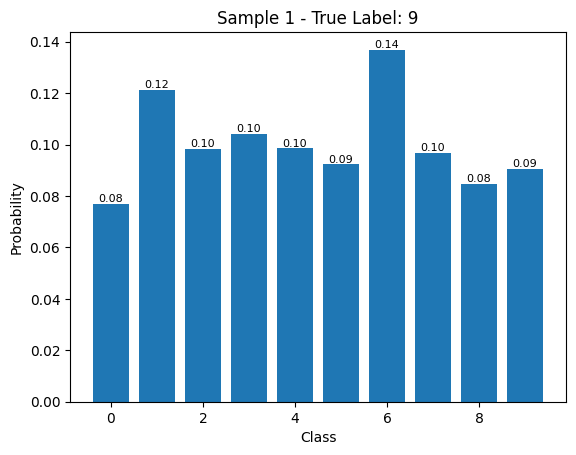

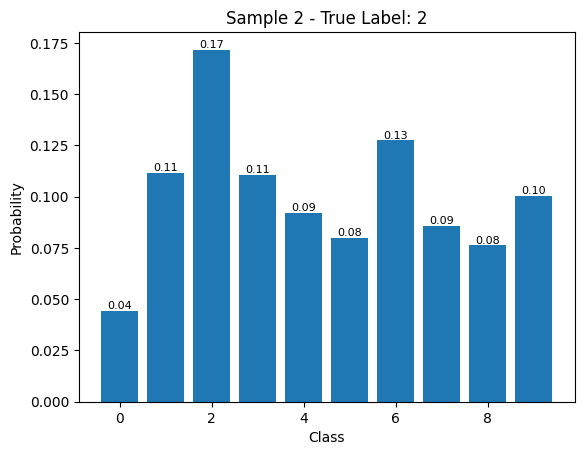

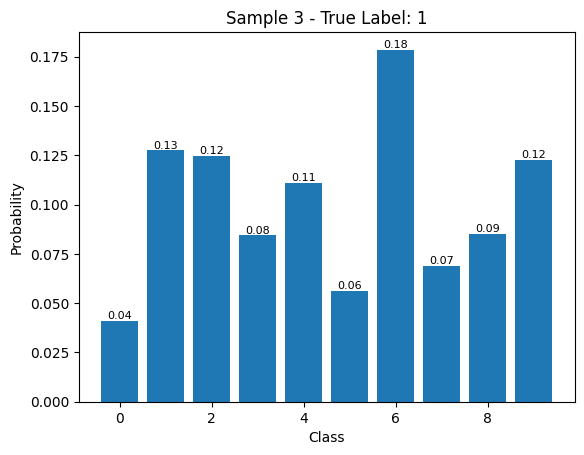

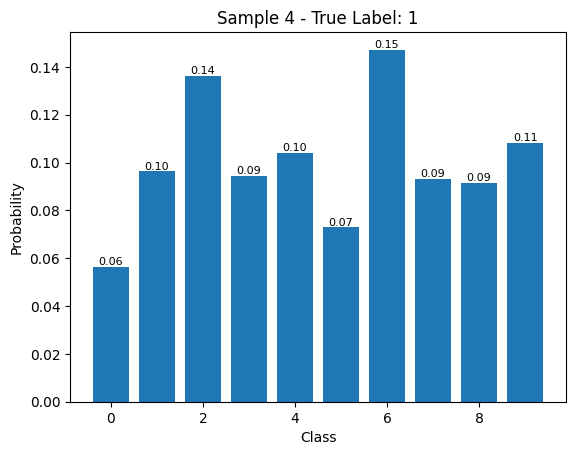

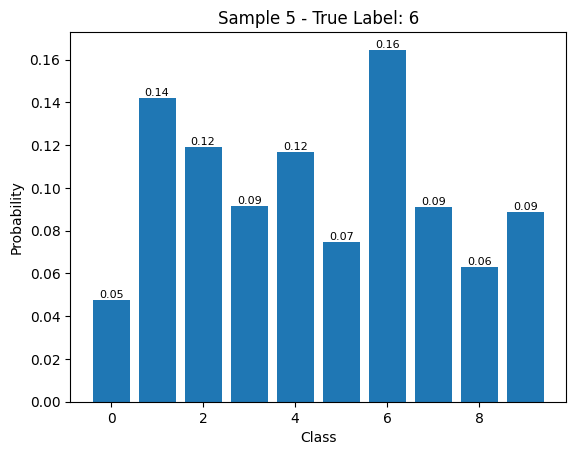

In [5]:

sample_images = X_test[:5]
sample_labels=y_test[:5]
probabilities = model.forward(sample_images) 

wandb.init(project="DA6401_Assignment1", entity="ns25z040-indian-institute-of-technology-madras", name="Q2_FeedForward")
# Log probabilities in wandb
for i, (prob, true_label) in enumerate(zip(probabilities, y_test[:5])):
    plt.figure()
    # Create bar plot for probability distribution
    bars = plt.bar(range(10), prob)
    plt.title(f"Sample {i+1} - True Label: {true_label}")
    plt.xlabel("Class")
    plt.ylabel("Probability")

    # Annotate each bar with its probability value
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{prob[idx]:.2f}", 
                 ha="center", va="bottom", fontsize=8)

    # Save the plot as a Wandb image and log it together with the probability list and true label
    wandb.log({
        f"sample_{i+1}": {
            "plot": wandb.Image(plt, caption=f"Probabilities for sample {i+1}")
        }
    })
    plt.show()
    plt.close()

In [6]:
wandb.finish()